<a href="https://colab.research.google.com/github/federico2018lc/Algebra/blob/main/Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Álgebra Regresión Lineal

---

Dataset: https://www.kaggle.com/datasets/emanfatima2025/student-academic-performance-trends

In [1]:
import numpy as np
import pandas as pd

In [15]:
# Lectura de del archivo csv. Hay que tener el archivo .cvs en los archivos de colab (margen izquierdo)
df = pd.read_csv("student_exam_scores.csv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


EDA (Análisis exploratorio de datos)

In [17]:
df.columns

Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')

In [14]:
#Tamaño de la matriz n*m n:filas m:columnas
df.shape

(200, 5)

In [10]:
#tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [7]:
#estadística sobre variables numericas
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [21]:
#Eliminar columnas student_id ya que no aporta información relevante al caso
df = df.drop(columns=['student_id'])
df.head()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3


In [24]:
#Buscamos si hay datos faltantes
df.isnull().sum()

,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


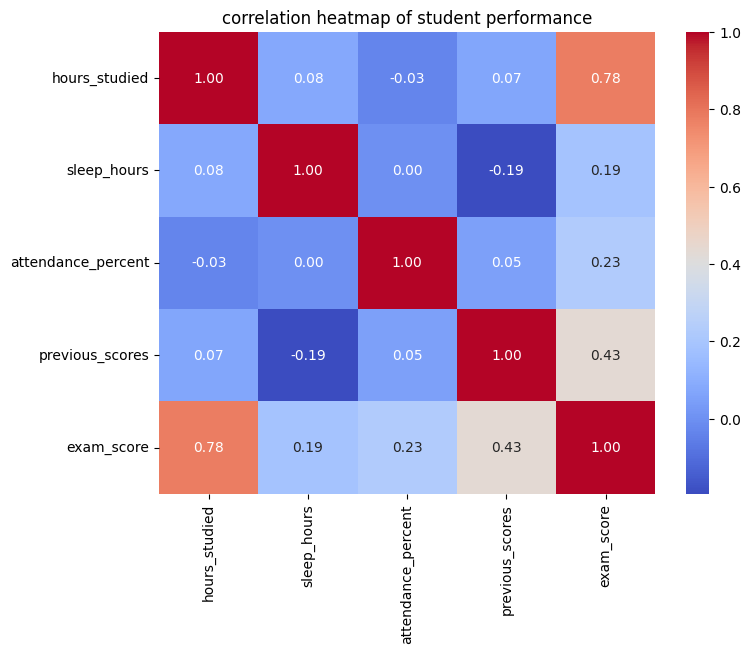

In [26]:
#Avanzado (opcional)
import matplotlib.pyplot as plt
import seaborn as sns
#crear una martriz de correlación, cuanto mas cerca al 1 mas relacionado se supone que esta.
plt.figure(figsize=(8 , 6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('correlation heatmap of student performance')
plt.show()

# Planes:
`y:examen_score `
` X: [hours_studied, sleep_hours, 	attendance_percent, previous_scores] `


*   Plan A. Hacer regresión lineal con la variable que mayor se relaciona. (con esto ya cumple) a.x = y
*   Plan B. Hacer A y he ir agregando variables. a.x1 + b.x2 = y
*   Plan C. Hacer todas las variables en un solo modelo